In [107]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [108]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [84]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [109]:
# preparer the data 
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Create a StandardScaler instance
scaler = StandardScaler()


In [113]:
# Create a DataFrame with the scaled data
scaled_data = scaler.fit_transform(market_data_df)

# Copy the crypto names from the original data
crypto_names = market_data_df.index
# Set the coinid column as index
scaled_data_df = pd.DataFrame(scaled_data, index=market_data_df.index, columns=market_data_df.columns)

# Display sample data
market_data_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [114]:

# Find the best value for k using the Original Scaled DataFrame
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)


# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(market_data_df)
    inertia_values.append(kmeans.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia_values} 
# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data) 
# Display the DataFrame
elbow_df.head(10)

/Users/KTSnyder/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/KTSnyder/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/KTSnyder/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/KTSnyder/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: 

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,123.190482
3,4,79.022435
4,5,65.302379
5,6,52.101806
6,7,46.035250
7,8,37.284807
8,9,32.161417
9,10,28.075253


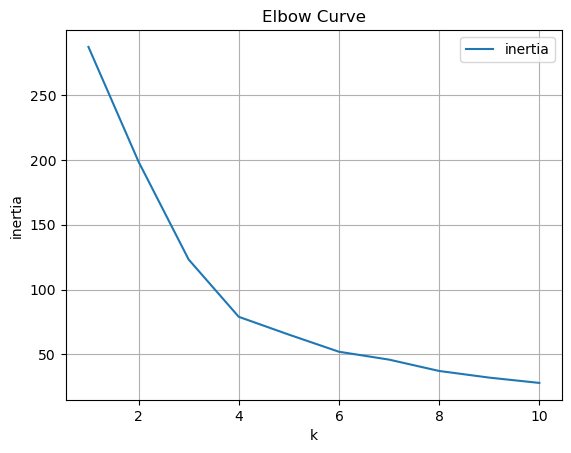

In [115]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Use the DataFrame plot method
# df.plot(x='k', y='inertia', kind='line')
import matplotlib.pyplot as plt
elbow_df.plot(x='k', y='inertia', kind='line')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Elbow Curve')
plt.grid(True)       
plt.show()


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** It appears that the curve starts to flatten out after k = 4, as the decrease in inertia from k = 4 to k= 5 and beyond is less steep Therefore, based on this chart, a good candidate for the optimal number of clusters could be k = 4


### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [118]:
# Replace 4 with the actual value of best_k
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=0)


In [119]:
# Fit the K-Means model using the scaled data
kmeans.fit(market_data_df)
        

/Users/KTSnyder/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [120]:
# Predict the clusters to group the cryptocurrencies using the scaled data

clusters = kmeans.predict(market_data_df)
# View the resulting array of cluster values.
market_data_df['Cluster'] = clusters
market_data_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [121]:
# Create a copy of the DataFrame
clustered_df = market_data_df.copy()

In [126]:
# Add a new column to the DataFrame with the predicted clusters
clustered_df["class"] = kmeans.labels_

# Display sample data
clustered_df.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster,class
coin_id,,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2,2


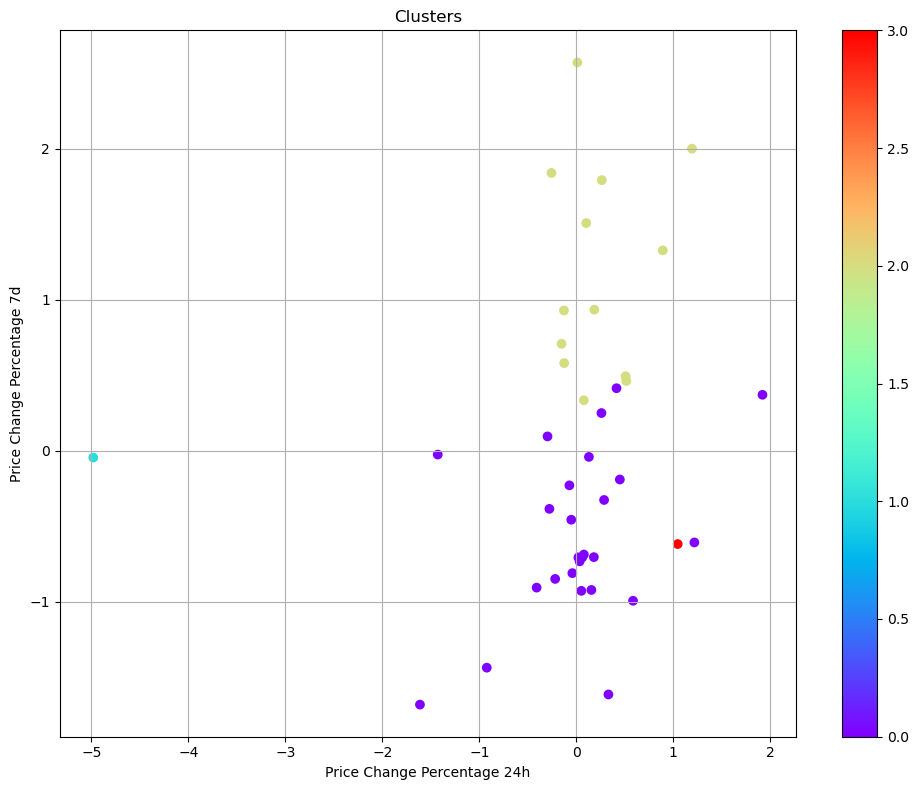

In [128]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.scatter(clustered_df.price_change_percentage_24h, clustered_df.price_change_percentage_7d, c=clustered_df["class"], cmap="rainbow")
plt.xlabel("Price Change Percentage 24h")
plt.ylabel("Price Change Percentage 7d")
plt.title("Clusters")
plt.colorbar()
plt.tight_layout()
plt.grid(True)
plt.show()


### Optimize Clusters with Principal Component Analysis.

In [129]:
# Optimize Clusters with Principal Component Analysis
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [131]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
import pandas as pd
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_data, columns=["PC1", "PC2", "PC3"], index=crypto_names)

# View the first five rows of the DataFrame. 
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [132]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print(explained_variance)


[0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is approximately 89.50%. This means that these three principal components together capture about 89.50% of the total variance in the original scaled dataset, providing a substantial summary of the data with reduced dimensionality. ​

In [134]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_df_new = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2', 'PCA3'])


# Copy the crypto names from the original data
pca_df_new['coin_id'] = market_data_df.index.tolist()

# Set the coinid column as index
pca_df_new.set_index('coin_id', inplace=True)

# Display sample data
print(pca_df_new.head(5))

                  PCA1      PCA2      PCA3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


### Find the Best Value for k Using the PCA Data

In [137]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)


# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pca_df_new)
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df.head(10)      

/Users/KTSnyder/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/KTSnyder/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/KTSnyder/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/KTSnyder/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: 

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,93.774626
3,4,49.665497
4,5,37.839466
5,6,27.720626
6,7,21.182776
7,8,17.016962
8,9,13.668325
9,10,10.484890


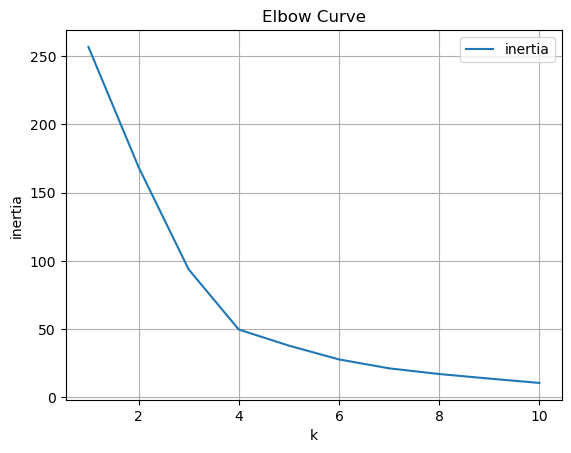

In [143]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Use the DataFrame plot method
# df.plot(x='k', y='inertia', kind='line')
elbow_df.plot(x='k', y='inertia', kind='line')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k when using the PCA data appears to be 4, as indicated by the Elbow Curve.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Based on the provided graphs, which seem identical, the best k value does not differ when using the PCA data compared to the original data. It remains at 4 in both cases.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [144]:
# Initialize the K-Means model using the best value for k
best_k = 4

In [149]:
# Fit the K-Means model using the PCA data
kmeans.fit(pca_df_new[['PCA1', 'PCA2', 'PCA3']])


/Users/KTSnyder/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [160]:
# Predict the clusters to group the cryptocurrencies using the PCA data
from scipy.cluster.vq import kmeans
import pandas as pd



# Print the resulting array of cluster values.
clusters = kmeans(pca_df_new, best_k)
print(clusters)


(array([[ 8.08901821, -3.89689054,  2.30138208],
       [-0.51072664,  0.84722621,  1.16731549],
       [-0.24007567, -0.53402803, -0.59574992],
       [ 4.7923954 ,  6.76767868, -1.98698545]]), 0.8946383799476766)


In [163]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_df_new[['PCA1', 'PCA2', 'PCA3']])

# Create a copy of the DataFrame with the PCA data
pca_df = pca_df_new.copy()
# Add a new column to the DataFrame with the predicted clusters
pca_df["class"] = kmeans.labels_
# Display sample data
pca_df.head()

/Users/KTSnyder/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,PCA1,PCA2,PCA3,class
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,0


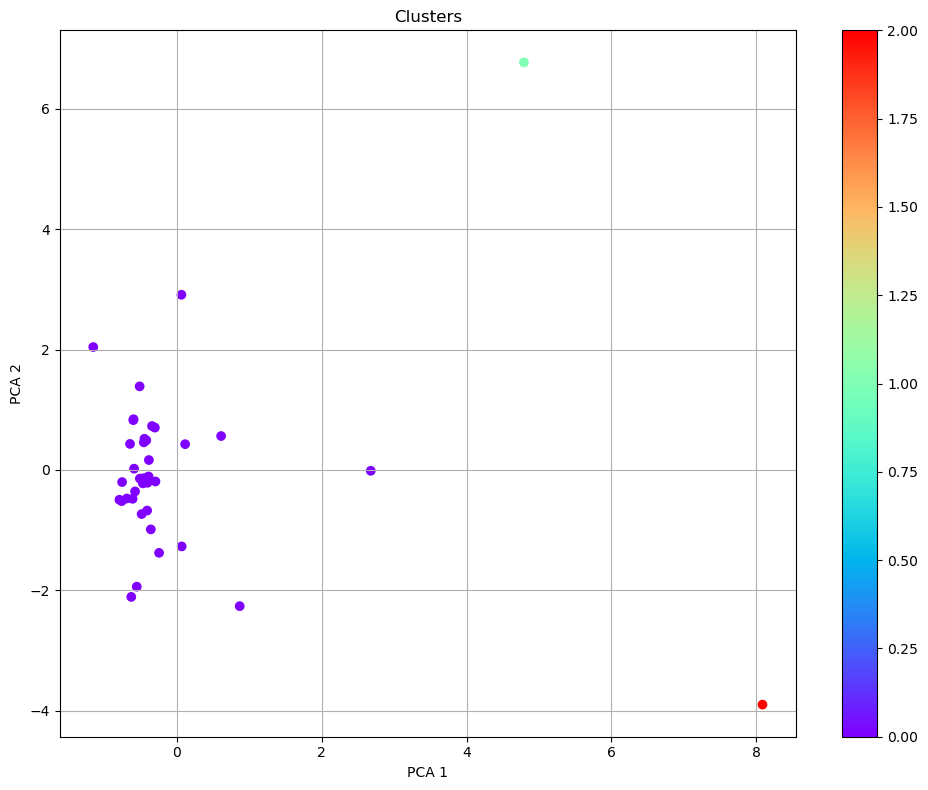

In [174]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
# Use "class" for the color to better visualize the data.
import hvplot.pandas
plot = pca_df.hvplot.scatter(x='PCA1', y='PCA2', by='class', color='class', colormap='viridis', width=600, height=400, title='Scatter Plot of PCA1 vs PCA2 by Cluster Class')
plot

pca_results = pca_df.copy()
plt.figure(figsize=(10, 8))
plt.scatter(pca_results.PCA1, pca_results.PCA2, c=pca_results["class"], cmap="rainbow")

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Clusters")
plt.colorbar()
plt.tight_layout()
plt.grid(True)
plt.show()


### Determine the Weights of Each Feature on each Principal Component


In [180]:

# Use the columns from the original scaled DataFrame as the index.
feature_weights_df = pd.DataFrame(pca.components_, columns=scaled_data_df.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])
# Display sample data
feature_weights_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
PC1,-0.416728,-0.102432,-0.009162,0.191523,0.320365,0.594468,0.568379
PC2,0.358162,0.227432,0.540415,0.562182,0.434040,0.027735,-0.150789
PC3,-0.218795,0.787670,0.349534,-0.181744,-0.361377,0.039733,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
PC1: price_change_percentage_200d (positive influence, weight: 0.594)
PC2: price_change_percentage_30d (positive influence, weight: 0.562)
PC3: price_change_percentage_7d (positive influence, weight: 0.788)

In [179]:
# Assuming feature_weights_df is the DataFrame created from pca.components_
# with columns named after the original features and indexed by components (PC1, PC2, ...)

# Identify the features with the strongest positive or negative influence on each component
strongest_features = feature_weights_df.abs().idxmax(axis=1)
strongest_values = feature_weights_df.max(axis=1)

# Display the features with the strongest influence for each component
for component, feature in strongest_features.items():
    value = feature_weights_df.loc[component, feature]
    print(f"{component}: {feature} ({'positive' if value > 0 else 'negative'} influence, weight: {value:.3f})")


PC1: price_change_percentage_200d (positive influence, weight: 0.594)
PC2: price_change_percentage_30d (positive influence, weight: 0.562)
PC3: price_change_percentage_7d (positive influence, weight: 0.788)
